<a href="https://colab.research.google.com/github/rahayunr16/Submission-Analisis-Data-dengan-Python/blob/main/Submission_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Rahayu Nur Rahmawati
- **Email:** hyrahmaaa@gmail.com
- **ID Dicoding:** A229XBM406

## Menentukan Pertanyaan Bisnis

- Bagaimana pola musiman memengaruhi jumlah penyewaan sepeda?
- Apakah jumlah penyewaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan?
- Apakah kondisi cuaca memengaruhi tren penyewaan sepeda?
- Pada hari apa penyewaan sepeda mencapai jumlah tertinggi?
- Di bulan apa jumlah penyewaan sepeda paling tinggi?
- Mana yang lebih banyak: pengguna terdaftar atau pengguna tidak terdaftar?
- Bagaimana tren total penyewaan sepeda dari waktu ke waktu?

## Import Semua Packages/Library yang Digunakan

In [ ]:
!pip install numpy

In [ ]:
!pip install pandas

In [ ]:
!pip install scipy

In [ ]:
!pip install matplotlib

In [ ]:
!pip install seaborn

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import Dataset Day Bike-Sharing Rental**

In [ ]:
daydataset='/content/drive/MyDrive/LASKAR AI/SUBMISSION/dataset/day.csv'
day_df=pd.read_csv(daydataset)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Import Dataset Hour Bike-Sharing Rental**

In [ ]:
hourdataset='/content/drive/MyDrive/LASKAR AI/SUBMISSION/dataset/hour.csv'
hour_df=pd.read_csv(hourdataset)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**Karakteristik Data**

Baik hour.csv maupun day.csv memiliki kolom-kolom sebagai berikut (untuk kolom hr tidak tersedia di day.csv):
*   instant     : record index (indeks)
*   dteday      : date (tanggal)
*   season      : musim dengan keterangan :    
                  1 = springer (musim semi)
                  2 = summer (musim panas)
                  3 = fall (musim gugur)
                  4 = winter (musim dingin)
*   yr          : year (tahun) dengan keterangan :    
                  0 = 2011
                  1 = 2012
*   mnth        : month dengan keterangan :    
                  1   = January
                  2   = February
                  3   = March
                  4   = April
                  5   = May
                  6   = June
                  7   = July
                  8   = August
                  9   = September
                  10  = October
                  11  = November
                  12  = Desember
*   hr          : hour 0 to 23 (waktu spesifik dalam sehari) dengan   
                  contoh:  
                  0   = 00.00
                  12  = 12.00
*   holiday     : keterangan apakah sedang di tanggal untuk holiday atau buka(extracted from http://dchr.dc.gov/page/holiday-schedule) dengan boolean 0 untuk False dan 1 untuk True.
*   weekday     : hari dalam seminggu dengan keterangan :     
                  0 = Sunday
                  1 = Monday
                  2 = Tuesday
                  3 = Wednesday
                  4 = Thursday
                  5 = Friday
                  6 = Saturday              
*   workingday  : keterangan apakah sedang di tanggal untuk selain holiday atau weekend dengan boolean 0 untuk False dan 1 untuk True.
*   weathersit  : kondisi cuaca dengan keterangan :
                  1 = Clear, Few clouds, Partly cloudy, Partly cloudy
                  2 = Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                  3 = Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                  4 = Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
*   temp        : suhu dalam skala Celsius yang dinormalisasi (dibagi 41)
*   atemp       : suhu yang terasa dalam skala Celsius yang dinormalisasi (dibagi 50)
*   hum         : kelembaban yang dinormalisasi (dibagi 100)
*   windspeed   : kecepatan angin yang dinormalisasi (dibagi 67)
*   casual      : jumlah pengguna tidak terdaftar
*   registered  : jumlah pengguna terdaftar
*   cnt         : jumlah total peminjaman sepeda (gabungan dari casual dan registered)


**Asessing Day Dataset**

In [ ]:
day_df.shape

(731, 16)

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
#descriptive data
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


**Asessing Hour Dataset**

In [ ]:
hour_df.shape

(17379, 17)

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
#descriptive data
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Summary Asessing Day Dataset dan Hour Dataset**

Setelah membaca karakteristik dataset dan labelnya, ada beberapa masalah yang akan lebih baik untuk diselesaikan di cleaning data:
*   Pada penamaan label data masih terdapat penamaan dengan singkatan sehingga
    sulit dimengerti dengan jelas.
*   Label instant adalah record index sehingga tidak diperlukan dalam analisis.
*   Label dteday adalah tanggal/date sehingga tipe datanya harus diubah menjadi
    tipe data untuk datetime.
*   Label season diisi dengan 1,2,3,4 dengan tiap angka mewakili nama season.
    Oleh karena itu, akan lebih baik jika diganti langsung dengan nama season.
*   Label yr adalah tahun dan diisi dengan 0 dan 1 dengan tiap angka mewakili
    tahun tertentu. Oleh karena itu, akan lebih baik jika diganti langsung dengan nama tahun.
*   Label mnth adalah bulan dan diisi dengan 1-12 dengan tiap angka mewakili
    nama bulan. Oleh karena itu, akan lebih baik jika diganti langsung dengan nama bulan.
*   Label holiday diisi dengan boolean 0 dan 1 dengan masing-masing mewakili
    True or False. Oleh karena itu, akan lebih baik jika diganti langsung dengan keterangannya (hal ini akan membuat lebih enak dibaca pada visualisasi).
*   Label weekday adalah hari dalam seminggu dan diisi dengan 0-6 dengan tiap
    angka mewakili nama hari. Oleh karena itu, akan lebih baik jika diganti langsung dengan nama hari.
*   Label workingday diisi dengan boolean 0 dan 1 dengan masing-masing mewakili
    True or False. Oleh karena itu, akan lebih baik jika diganti langsung dengan keterangannya (hal ini akan membuat lebih enak dibaca pada visualisasi).
*   Label weathersit diisi dengan 1,2,3,4 dengan tiap angka mewakili kondisi
    cuaca. Oleh karena itu, akan lebih baik jika diganti langsung dengan kondisi cuaca yang mewakili keterangan kondisi cuaca secara lengkap.
*   Agar proses EDA lebih mudah, untuk label temp, atemp, hum, windspeed nilainya dikembalikan kepada nilai asli pada realitas sehingga harus dikalikan dengan keterangan berikut:  
    - temp = dikalikan 41
    - atemp = dikalikan 50
    - hum = dikalikan 100
    - windspeed = dikalikan 67
*   Berdasarkan descriptive data, untuk day_df terdapat kondisi minimal hum bernilai 0.0000. Hal ini bisa dikatakan tidak mungkin dan aneh.
*   Berdasarkan descriptive data, untuk hour_df terdapat kondisi minimal atemp, hum, dan windspeed bernilai 0.0000. Hal ini bisa dikatakan tidak mungkin dan aneh.

### Cleaning Data

1. Pada penamaan label data masih terdapat penamaan dengan singkatan sehingga sulit dimengerti dengan jelas.

In [ ]:
day_df.rename(columns={
    'instant': 'index',
    'dteday': 'date',
    'season': 'season',
    'yr': 'year',
    'mnth': 'month',
    'holiday': 'holiday',
    'weekday': 'weekday',
    'workingday': 'working_day',
    'weathersit': 'weather_condition',
    'temp': 'temperature_celsius',
    'atemp': 'feels_like_temperature',
    'hum': 'humidity_percentage',
    'windspeed': 'wind_speed',
    'casual': 'casual_users',
    'registered': 'registered_users',
    'cnt': 'total_rentals'
}, inplace=True)

hour_df.rename(columns={
    'instant': 'index',
    'dteday': 'date',
    'season': 'season',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'holiday': 'holiday',
    'weekday': 'weekday',
    'workingday': 'working_day',
    'weathersit': 'weather_condition',
    'temp': 'temperature_celsius',
    'atemp': 'feels_like_temperature',
    'hum': 'humidity_percentage',
    'windspeed': 'wind_speed',
    'casual': 'casual_users',
    'registered': 'registered_users',
    'cnt': 'total_rentals'
}, inplace=True)

2. Label instant adalah record index sehingga tidak diperlukan dalam analisis.

In [ ]:
day_df = day_df.drop(columns=['index'])
hour_df = hour_df.drop(columns=['index'])

3. Label dteday adalah tanggal/date sehingga tipe datanya harus diubah menjadi tipe data untuk datetime.

In [ ]:
day_df.date = pd.to_datetime(day_df.date)
hour_df.date = pd.to_datetime(hour_df.date)

4. Label season diisi dengan 1,2,3,4 dengan tiap angka mewakili nama season. Oleh karena itu, akan lebih baik jika diganti langsung dengan nama season.

In [ ]:
day_df['season'] = day_df['season'].map({1:'springer', 2:'summer', 3: 'fall', 4:'winter'})
hour_df['season'] = hour_df['season'].map({1:'springer', 2:'summer', 3: 'fall', 4:'winter'})

5. Label yr adalah tahun dan diisi dengan 0 dan 1 dengan tiap angka mewakili tahun tertentu. Oleh karena itu, akan lebih baik jika diganti langsung dengan nama tahun.

In [ ]:
day_df['year'] = day_df['year'].map({0:2011,1:2012})
hour_df['year'] = hour_df['year'].map({0:2011,1:2012})

6. Label mnth adalah bulan dan diisi dengan 1-12 dengan tiap angka mewakili nama bulan. Oleh karena itu, akan lebih baik jika diganti langsung dengan nama bulan.

In [ ]:
day_df['month'] = day_df['month'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'Desember'})
hour_df['month'] = hour_df['month'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'Desember'})

7. Label holiday diisi dengan boolean 0 dan 1 dengan masing-masing mewakili True or False. Oleh karena itu, akan lebih baik jika diganti langsung dengan keterangannya (hal ini akan membuat lebih enak dibaca pada visualisasi).

In [ ]:
day_df['holiday'] = day_df['holiday'].map({0:False,1:True})
hour_df['holiday'] = hour_df['holiday'].map({0:False,1:True})

8. Label weekday adalah hari dalam seminggu dan diisi dengan 0-6 dengan tiap angka mewakili nama hari. Oleh karena itu, akan lebih baik jika diganti langsung dengan nama hari.

In [ ]:
day_df['weekday'] = day_df['weekday'].map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})
hour_df['weekday'] = hour_df['weekday'].map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})

9. Label workingday diisi dengan boolean 0 dan 1 dengan masing-masing mewakili True or False. Oleh karena itu, akan lebih baik jika diganti langsung dengan keterangannya (hal ini akan membuat lebih enak dibaca pada visualisasi).

In [ ]:
day_df['working_day'] = day_df['working_day'].map({0:False,1:True})
hour_df['working_day'] = hour_df['working_day'].map({0:False,1:True})

10. Label weathersit diisi dengan 1,2,3,4 dengan tiap angka mewakili kondisi cuaca. Oleh karena itu, akan lebih baik jika diganti langsung dengan kondisi cuaca yang mewakili keterangan kondisi cuaca secara lengkap.

In [ ]:
day_df['weather_condition'] = day_df['weather_condition'].map({1:'Clear',2:'Cloudy',3:'Rain/ Snow',4:'Stormy'})
hour_df['weather_condition'] = hour_df['weather_condition'].map({1:'Clear',2:'Cloudy',3:'Rain/ Snow',4:'Stormy'})

11. Agar proses EDA lebih mudah, untuk label temp, atemp, hum, windspeed nilainya dikembalikan kepada nilai asli pada realitas sehingga harus dikalikan dengan keterangan berikut:
temp = dikalikan 41
atemp = dikalikan 50
hum = dikalikan 100
windspeed = dikalikan 67


In [ ]:
day_df['temperature_celsius'] = day_df['temperature_celsius']*41
day_df['feels_like_temperature'] = day_df['feels_like_temperature']*50
day_df['humidity_percentage'] = day_df['humidity_percentage']*100
day_df['wind_speed'] = day_df['wind_speed']*67

hour_df['temperature_celsius'] = hour_df['temperature_celsius']*41
hour_df['feels_like_temperature'] = hour_df['feels_like_temperature']*50
hour_df['humidity_percentage'] = hour_df['humidity_percentage']*100
hour_df['wind_speed'] = hour_df['wind_speed']*67


12. Berdasarkan descriptive data, untuk day_df terdapat kondisi minimal hum bernilai 0.0000. Hal ini bisa dikatakan tidak mungkin dan aneh.


In [ ]:
day_df.humidity_percentage.describe()

,humidity_percentage
count,731.000000
mean,62.789406
std,14.242910
min,0.000000
25%,52.000000
50%,62.666700
75%,73.020850
max,97.250000


In [ ]:
day_df[day_df['humidity_percentage'] == 0]

,date,season,year,month,holiday,weekday,working_day,weather_condition,temperature_celsius,feels_like_temperature,humidity_percentage,wind_speed,casual_users,registered_users,total_rentals
68,2011-03-10,springer,2011,March,False,Thursday,True,Rain/ Snow,15.952731,19.2834,0.0,17.545759,46,577,623


In [ ]:
#Akan digunakan median untuk mengganti null label humidity_percentage
day_df['humidity_percentage'] = day_df['humidity_percentage'].replace(0, day_df['humidity_percentage'].median())

13. Berdasarkan descriptive data, untuk hour_df terdapat kondisi minimal atemp, hum, dan windspeed bernilai 0.0000. Hal ini bisa dikatakan tidak mungkin dan aneh.

In [ ]:
hour_df[['feels_like_temperature', 'humidity_percentage', 'wind_speed']].describe()

,feels_like_temperature,humidity_percentage,wind_speed
count,17379.000000,17379.000000,17379.000000
mean,23.788755,62.722884,12.736540
std,8.592511,19.292983,8.196795
min,0.000000,0.000000,0.000000
25%,16.665000,48.000000,7.001500
50%,24.240000,63.000000,12.998000
75%,31.060000,78.000000,16.997900
max,50.000000,100.000000,56.996900


In [ ]:
conditions = ['feels_like_temperature', 'humidity_percentage', 'wind_speed']
for condition in conditions:
    hasil = hour_df[hour_df[f'{condition}'] == 0][f'{condition}'].count()
    print(f"{condition} memiliki 0 value sebanyak: {hasil}")

feels_like_temperature memiliki 0 value sebanyak: 2
humidity_percentage memiliki 0 value sebanyak: 22
wind_speed memiliki 0 value sebanyak: 2180


In [ ]:
#Akan digunakan median untuk mengganti null label feels_like_temperature dan humidity_percentage
cols = ['feels_like_temperature', 'humidity_percentage']
hour_df[cols] = hour_df[cols].replace(0, hour_df[cols].median())

In [ ]:
#Akan digunakan mean untuk mengganti null label humidity_percentage
hour_df['wind_speed'] = hour_df['wind_speed'].replace(0, hour_df['wind_speed'].mean())

14. Cek duplikat data

**Day Dataset**

In [ ]:
day_df.duplicated().sum()

0

**Hour Dataset**

In [ ]:
hour_df.duplicated().sum()

0

15. Cek missing value

**Day Dataset**

In [ ]:
day_df.isnull().sum()

,0
date,0
season,0
year,0
month,0
holiday,0
weekday,0
working_day,0
weather_condition,0
temperature_celsius,0
feels_like_temperature,0


**Hour Dataset**

In [ ]:
hour_df.isnull().sum()

,0
date,0
season,0
year,0
month,0
hour,0
holiday,0
weekday,0
working_day,0
weather_condition,0
temperature_celsius,0


15. Cek Outlier pada data yang berpotensi yaitu casual_users, registered_users, total_rentals, temperature_celsius, feels_like_temperature, humidity_percentage, wind_speed

**Cek Outliers casual_users**

<Figure size 800x400 with 0 Axes>

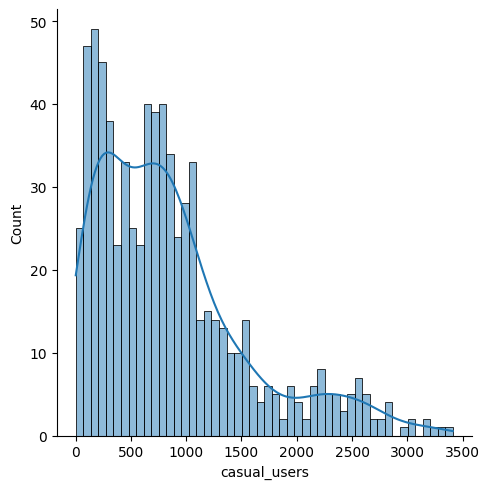

In [ ]:
plt.figure(figsize=(8,4))
sns.displot(day_df['casual_users'], kde=True, bins=50)

In [ ]:
Q1 = day_df['casual_users'].quantile(0.25)
Q3 = day_df['casual_users'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = day_df[(day_df['casual_users'] < lower_bound) | (day_df['casual_users'] > upper_bound)]

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Batas Bawah: {lower_bound}, Batas Atas: {upper_bound}")
print(f"Jumlah Outliers: {len(outliers)}")

Q1: 315.5, Q3: 1096.0, IQR: 780.5
Batas Bawah: -855.25, Batas Atas: 2266.75
Jumlah Outliers: 44


**Insight:**

- Ternyata hasil batas bawah adalah nilai negatif, dan jumlah casual_users tidak mungkin negatif. Oleh karena itu, harus ditetapkan batas bawah = 0.

In [ ]:
Q1 = day_df['casual_users'].quantile(0.25)
Q3 = day_df['casual_users'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = 0
upper_bound = Q3 + 1.5 * IQR

outliers = day_df[(day_df['casual_users'] < lower_bound) | (day_df['casual_users'] > upper_bound)]

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Batas Bawah: {lower_bound}, Batas Atas: {upper_bound}")
print(f"Jumlah Outliers: {len(outliers)}")

Q1: 315.5, Q3: 1096.0, IQR: 780.5
Batas Bawah: 0, Batas Atas: 2266.75
Jumlah Outliers: 44


In [ ]:
outliers

,date,season,year,month,holiday,weekday,working_day,weather_condition,temperature_celsius,feels_like_temperature,humidity_percentage,wind_speed,casual_users,registered_users,total_rentals
148,2011-05-29,summer,2011,May,False,Sunday,False,Clear,27.367500,30.77750,81.8750,14.333846,2355,2433,4788
183,2011-07-03,fall,2011,July,False,Sunday,False,Cloudy,29.383347,33.42875,68.2500,15.333486,2282,2367,4649
184,2011-07-04,fall,2011,July,True,Monday,False,Cloudy,29.793347,33.27085,63.7917,5.459106,3065,2978,6043
196,2011-07-16,fall,2011,July,False,Saturday,False,Clear,28.153347,31.91315,58.5000,13.958914,2418,3505,5923
246,2011-09-04,fall,2011,September,False,Sunday,False,Clear,29.075847,33.27145,74.2083,13.833289,2521,2419,4940
281,2011-10-09,winter,2011,October,False,Sunday,False,Clear,22.174153,26.19915,72.7500,4.251150,2397,3114,5511
441,2012-03-17,springer,2012,March,False,Saturday,False,Cloudy,21.080847,25.25230,75.5833,7.417168,3155,4681,7836
447,2012-03-23,summer,2012,March,False,Friday,True,Cloudy,24.668347,28.50335,69.4167,7.792100,2469,5893,8362
455,2012-03-31,summer,2012,March,False,Saturday,False,Cloudy,17.390847,21.08540,73.8333,16.791339,2301,3934,6235
456,2012-04-01,summer,2012,April,False,Sunday,False,Cloudy,17.459153,20.86435,67.6250,11.541889,2347,3694,6041


**Insight:**

- Total casual_users masih dalam batas wajar 2000-4000 sehingga tidak perlu dihapus

**Cek Outlier registered_users**

<Figure size 800x400 with 0 Axes>

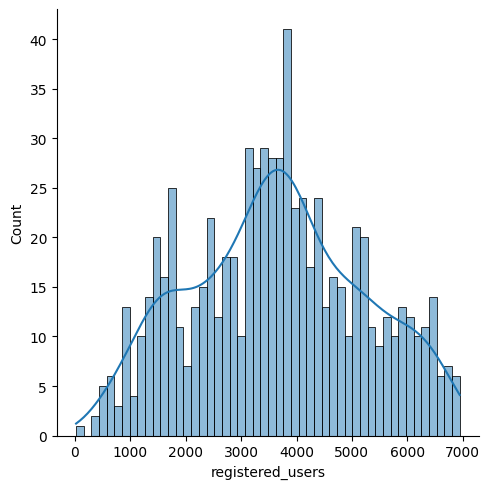

In [ ]:
plt.figure(figsize=(8,4))
sns.displot(day_df['registered_users'], kde=True, bins=50)

In [ ]:
Q1 = day_df['registered_users'].quantile(0.25)
Q3 = day_df['registered_users'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_registered_users = day_df[(day_df['registered_users'] < lower_bound) | (day_df['registered_users'] > upper_bound)]

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Batas Bawah: {lower_bound}, Batas Atas: {upper_bound}")
print(f"Jumlah Outliers: {len(outliers_registered_users)}")

Q1: 2497.0, Q3: 4776.5, IQR: 2279.5
Batas Bawah: -922.25, Batas Atas: 8195.75
Jumlah Outliers: 0


**Cek Outliers total_rentals**

<Figure size 800x400 with 0 Axes>

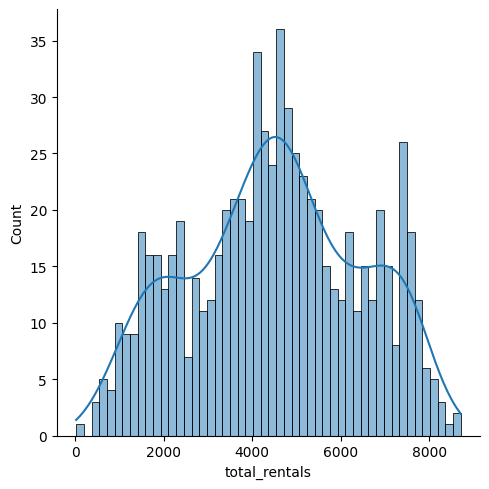

In [ ]:
plt.figure(figsize=(8,4))
sns.displot(day_df['total_rentals'], kde=True, bins=50)

In [ ]:
Q1 = day_df['total_rentals'].quantile(0.25)
Q3 = day_df['total_rentals'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_total_rentals = day_df[(day_df['total_rentals'] < lower_bound) | (day_df['total_rentals'] > upper_bound)]

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Batas Bawah: {lower_bound}, Batas Atas: {upper_bound}")
print(f"Jumlah Outliers: {len(outliers_total_rentals)}")

Q1: 3152.0, Q3: 5956.0, IQR: 2804.0
Batas Bawah: -1054.0, Batas Atas: 10162.0
Jumlah Outliers: 0


**Cek Outliers temperature_celsius**

<Figure size 800x400 with 0 Axes>

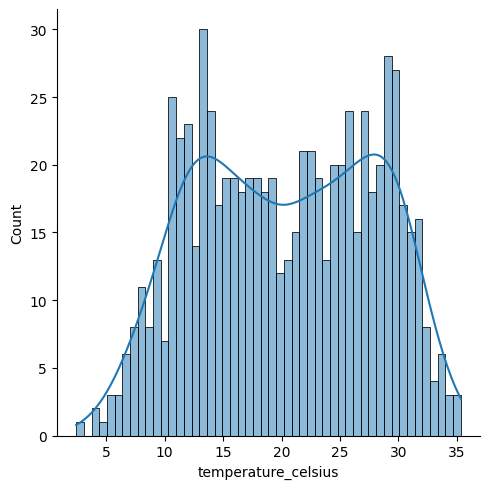

In [ ]:
plt.figure(figsize=(8,4))
sns.displot(day_df['temperature_celsius'], kde=True, bins=50)

In [ ]:
Q1 = day_df['temperature_celsius'].quantile(0.25)
Q3 = day_df['temperature_celsius'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_temperature_celsius = day_df[(day_df['temperature_celsius'] < lower_bound) | (day_df['temperature_celsius'] > upper_bound)]

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Batas Bawah: {lower_bound}, Batas Atas: {upper_bound}")
print(f"Jumlah Outliers: {len(outliers_temperature_celsius)}")

Q1: 13.8204235, Q3: 26.8720765, IQR: 13.051652999999998
Batas Bawah: -5.757055999999995, Batas Atas: 46.449555999999994
Jumlah Outliers: 0


**Cek Outliers feels_like_temperature**

<Figure size 800x400 with 0 Axes>

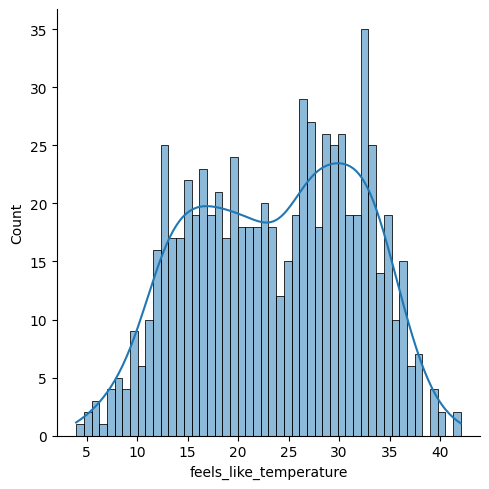

In [ ]:
plt.figure(figsize=(8,4))
sns.displot(day_df['feels_like_temperature'], kde=True, bins=50)

In [ ]:
Q1 = day_df['feels_like_temperature'].quantile(0.25)
Q3 = day_df['feels_like_temperature'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_feels_like_temperature = day_df[(day_df['feels_like_temperature'] < lower_bound) | (day_df['feels_like_temperature'] > upper_bound)]

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Batas Bawah: {lower_bound}, Batas Atas: {upper_bound}")
print(f"Jumlah Outliers: {len(outliers_feels_like_temperature)}")

Q1: 16.892125, Q3: 30.430100000000003, IQR: 13.537975000000003
Batas Bawah: -3.4148375000000044, Batas Atas: 50.73706250000001
Jumlah Outliers: 0


**Cek Outliers humidity_percentage**

<Figure size 800x400 with 0 Axes>

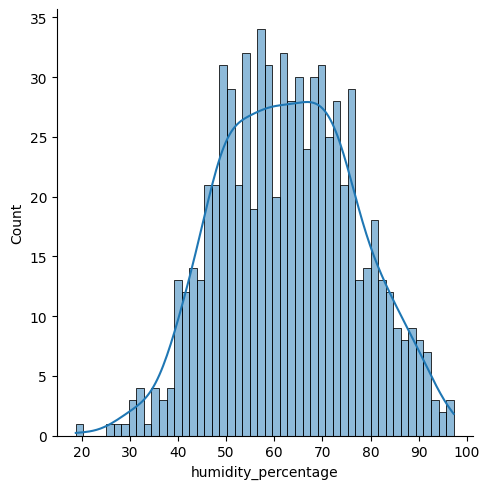

In [ ]:
plt.figure(figsize=(8,4))
sns.displot(day_df['humidity_percentage'], kde=True, bins=50)

In [ ]:
Q1 = day_df['humidity_percentage'].quantile(0.25)
Q3 = day_df['humidity_percentage'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_humidity_percentage = day_df[(day_df['humidity_percentage'] < lower_bound) | (day_df['humidity_percentage'] > upper_bound)]

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Batas Bawah: {lower_bound}, Batas Atas: {upper_bound}")
print(f"Jumlah Outliers: {len(outliers_humidity_percentage)}")

Q1: 52.10415, Q3: 73.02085, IQR: 20.9167
Batas Bawah: 20.7291, Batas Atas: 104.3959
Jumlah Outliers: 1


In [ ]:
outliers_humidity_percentage.head()

,date,season,year,month,holiday,weekday,working_day,weather_condition,temperature_celsius,feels_like_temperature,humidity_percentage,wind_speed,casual_users,registered_users,total_rentals
49,2011-02-19,springer,2011,February,False,Saturday,False,Clear,16.365847,19.5702,18.7917,34.000021,532,1103,1635


**Insight:**

- Oleh karena outlier pada humidity_percentage masih terbilang wajar untuk keterangan hasil dari label lainnya sehingga tidak perlu untuk dihilangkan

**Cek Outliers wind_speed**

<Figure size 800x400 with 0 Axes>

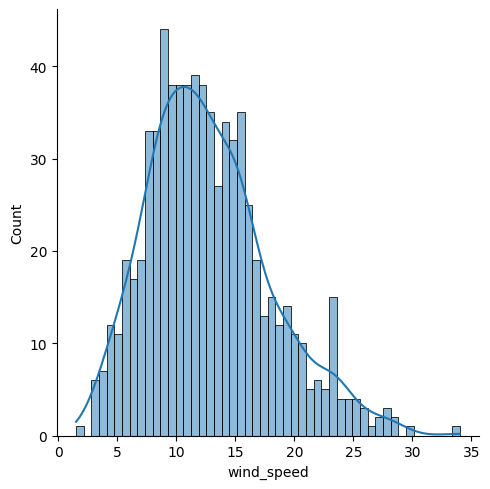

In [ ]:
plt.figure(figsize=(8,4))
sns.displot(day_df['wind_speed'], kde=True, bins=50)

In [ ]:
Q1 = day_df['wind_speed'].quantile(0.25)
Q3 = day_df['wind_speed'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_wind_speed = day_df[(day_df['wind_speed'] < lower_bound) | (day_df['wind_speed'] > upper_bound)]

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Batas Bawah: {lower_bound}, Batas Atas: {upper_bound}")
print(f"Jumlah Outliers: {len(outliers_wind_speed)}")

Q1: 9.041649999999999, Q3: 15.6253715, IQR: 6.583721500000001
Batas Bawah: -0.8339322500000019, Batas Atas: 25.50095375
Jumlah Outliers: 13


In [ ]:
outliers_wind_speed

,date,season,year,month,holiday,weekday,working_day,weather_condition,temperature_celsius,feels_like_temperature,humidity_percentage,wind_speed,casual_users,registered_users,total_rentals
44,2011-02-14,springer,2011,February,False,Monday,True,Clear,17.015000,19.91750,37.5833,27.999836,208,1705,1913
49,2011-02-19,springer,2011,February,False,Saturday,False,Clear,16.365847,19.57020,18.7917,34.000021,532,1103,1635
93,2011-04-04,summer,2011,April,False,Monday,True,Clear,23.506653,27.14645,42.6250,25.833257,734,2381,3115
94,2011-04-05,summer,2011,April,False,Tuesday,True,Cloudy,16.980847,19.91750,64.2083,26.000489,167,1628,1795
292,2011-10-20,winter,2011,October,False,Thursday,True,Clear,19.509153,23.32625,63.6250,28.292425,471,3724,4195
382,2012-01-18,springer,2012,January,False,Wednesday,True,Clear,12.436653,13.76270,44.3333,27.833743,109,3267,3376
407,2012-02-12,springer,2012,February,False,Sunday,False,Clear,5.227500,5.08290,46.4583,27.417204,73,1456,1529
420,2012-02-25,springer,2012,February,False,Saturday,False,Clear,11.924153,12.78375,39.5833,28.250014,317,2415,2732
432,2012-03-08,springer,2012,March,False,Thursday,True,Clear,21.627500,26.23020,56.7500,29.584721,486,4896,5382
433,2012-03-09,springer,2012,March,False,Friday,True,Cloudy,16.844153,19.85415,40.7083,27.791600,447,4122,4569


**Insight:**

- Oleh karena outliers yang berada pada wind_speed masih terbilang cukup wajar (didukung oleh keterangan hasil label lainnya), maka outlier tidak perlu didrop

## Exploratory Data Analysis (EDA)

Beberapa pertanyaan untuk membantu eksplorasi:
1.   Bagaimana pola musiman memengaruhi jumlah penyewaan sepeda?
2.   Apakah jumlah penyewaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan?
3.   Apakah kondisi cuaca memengaruhi tren penyewaan sepeda?
4.   Pada hari apa penyewaan sepeda mencapai jumlah tertinggi?
5.   Di bulan apa jumlah penyewaan sepeda paling tinggi?
6.   Mana yang lebih banyak: pengguna terdaftar atau pengguna tidak terdaftar?
7.   Bagaimana tren total penyewaan sepeda dari waktu ke waktu?

###**Day Dataset**

In [ ]:
day_df.head()

,date,season,year,month,holiday,weekday,working_day,weather_condition,temperature_celsius,feels_like_temperature,humidity_percentage,wind_speed,casual_users,registered_users,total_rentals
0,2011-01-01,springer,2011,January,False,Saturday,False,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2011-01-02,springer,2011,January,False,Sunday,False,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2011-01-03,springer,2011,January,False,Monday,True,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2011-01-04,springer,2011,January,False,Tuesday,True,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2011-01-05,springer,2011,January,False,Wednesday,True,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
day_df.describe()

,date,year,temperature_celsius,feels_like_temperature,humidity_percentage,wind_speed,casual_users,registered_users,total_rentals
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,2011.500684,20.310776,23.717699,62.875134,12.762576,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,2011.000000,2.424346,3.953480,18.791700,1.500244,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,2011.000000,13.820424,16.892125,52.104150,9.041650,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,2012.000000,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,2012.000000,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,2012.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,NaN,0.500342,7.505091,8.148059,14.051777,5.192357,686.622488,1560.256377,1937.211452


In [ ]:
day_df[['year', 'month','season','weekday','weather_condition']].mode().iloc[0]

,0
year,2012.0
month,August
season,fall
weekday,Monday
weather_condition,Clear


In [ ]:
day_df.shape

(731, 15)

**Insight:**

- Berdasarkan summary karakteristik deskriptif dari data tersebut, diperoleh bahwa data memiliki modus untuk tahun di 2012 walaupun hari yang tercatat adalah 731 hari untuk tahun 2011-2012, bulan di Agustus, musim di musim gugur, hari di Senin, kondisi cuaca ketika cerah. Tapi perlu ditelisik apakah ini juga berpengaruh sama dengan total penyewaan?

- Selain itu, diperoleh juga bahwa mean dari pengguna terdaftar adalah 4 kali pengguna casual.

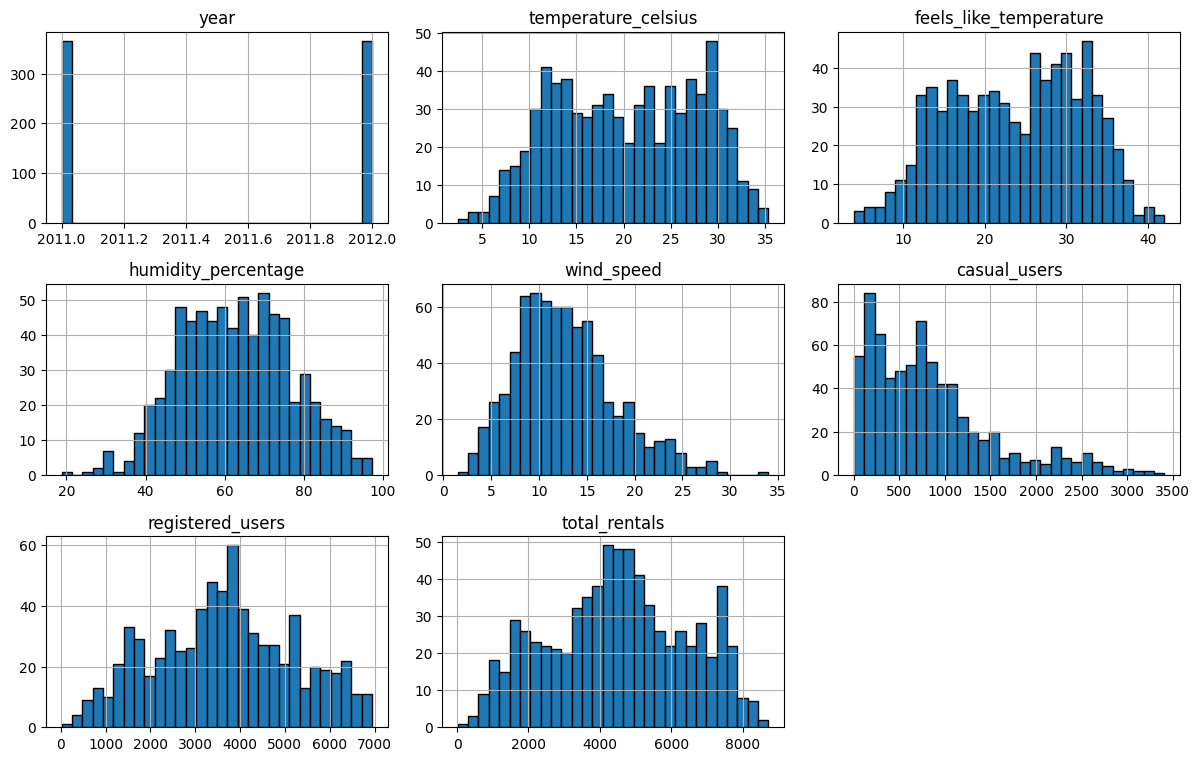

In [ ]:
numerical_columns = day_df.select_dtypes(include=['number'])

numerical_columns.hist(figsize=(12, 10), bins=30, layout=(4, 3), edgecolor='black')

plt.tight_layout()
plt.show()

**Insight:**

- Karena kita memiliki label season yang pasti identik dengan temperature_celsius, feels_like_temperature, humidity_percentage, dan wind_speed, maka perlu diindentifikasi karakteristik musimnya.

In [ ]:
round(day_df.groupby(by= "season").agg({
    'temperature_celsius': 'mean',
    'feels_like_temperature': 'mean',
    'humidity_percentage': 'mean',
    'wind_speed': 'mean',
}), 2)

,temperature_celsius,feels_like_temperature,humidity_percentage,wind_speed
season,,,,
fall,28.96,32.79,63.35,11.53
springer,12.21,14.85,58.64,14.37
summer,22.32,26.02,62.69,13.63
winter,17.34,20.78,66.87,11.52


**Insight:**

- Selanjutnya adalah akan dicari nilai korelasi dari masing-masing label yang bisa dianalisis (nilai int atau float) yaitu temperature_celsius, feels_like_temperature, humidity_percentage, wind_speed, casual_users, registered_users, total_rentals.

<Axes: >

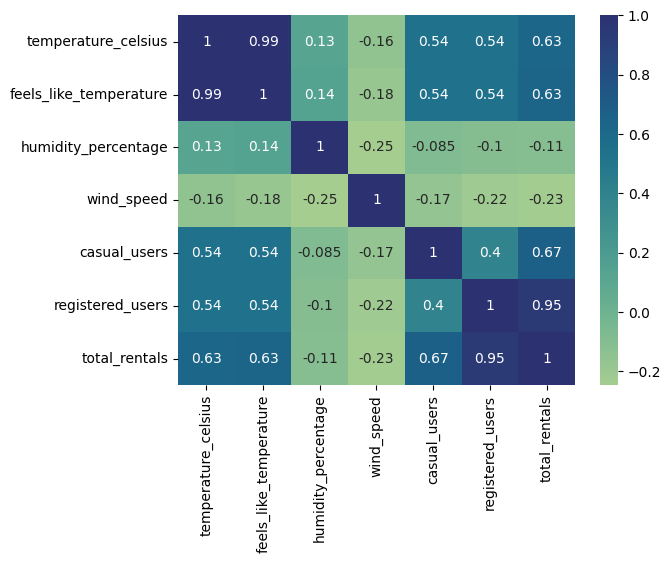

In [ ]:
cor = day_df[['temperature_celsius', 'feels_like_temperature', 'humidity_percentage', 'wind_speed','casual_users','registered_users','total_rentals']].corr()
sns.heatmap(data=cor, annot=True, cmap="crest")

**Insight:**

- Berikut merupakan korelasi temperature_celsius, feels_like_temperature, humidity_percentage, wind_speed, casual_users, registered_users, total_rentals. Diperoleh informasi bahwa yang mempengaruhi total_rentals dan banyak pengguna adalah variabel temperature_celsius dan feels_like_temperature.
- Selain itu total_rentals juga dipengaruhi variabel humidity_percentage dan wind_speed dengan korelasi negatif tetapi cukup lemah.

In [ ]:
day_df[['holiday','working_day']].value_counts()

holiday  working_day
False    True           500
         False          210
True     False           21
Name: count, dtype: int64

**Insight:**

- Diperoleh informasi bahwa dalam 731 hari diperoleh hari yang bekerja 500 hari dan tidak bekerja 231 hari dengan termasuk holiday 21 hari.

In [ ]:
day_df.pivot_table(index='season', values='total_rentals', aggfunc=['mean', 'sum'])

,mean,sum
,total_rentals,total_rentals
season,,
fall,5644.303191,1061129
springer,2604.132597,471348
summer,4992.331522,918589
winter,4728.162921,841613


**Insight:**

- Diperoleh bahwa paling banyak orang menggunakan bike-sharing rental pada fall season dengan rataan 5.645 buah dan total 1.061.129 buah

In [ ]:
day_df.pivot_table(index='working_day', values='total_rentals', aggfunc=['mean', 'sum'])

,mean,sum
,total_rentals,total_rentals
working_day,,
False,4330.168831,1000269
True,4584.820000,2292410


**Insight:**

-  bahwa paling banyak orang menggunakan bike-sharing rental pada saat hari kerja tapi tetap banyak ketika hari libur (rataan tidak terlalu jauh).

In [ ]:
day_df.pivot_table(index='weather_condition', values='total_rentals', aggfunc=['mean', 'sum'])

,mean,sum
,total_rentals,total_rentals
weather_condition,,
Clear,4876.786177,2257952
Cloudy,4035.862348,996858
Rain/ Snow,1803.285714,37869


**Insight:**

- Diperoleh bahwa paling banyak orang menggunakan bike-sharing rental pada saat kondisi cuaca Clear tapi tetap banyak ketika cuaca Cloudly (rataan tidak terlalu jauh).

In [ ]:
day_df.pivot_table(index='weekday', values='total_rentals', aggfunc=['mean', 'sum'])

,mean,sum
,total_rentals,total_rentals
weekday,,
Friday,4690.288462,487790
Monday,4338.123810,455503
Saturday,4550.542857,477807
Sunday,4228.828571,444027
Thursday,4667.259615,485395
Tuesday,4510.663462,469109
Wednesday,4548.538462,473048


**Insight:**

- Diperoleh bahwa paling banyak orang menggunakan bike-sahring pada hari Friday, tapi sebenarnya tersebar rata di setiap harinya (rataan tidak terlalu jauh).

In [ ]:
day_df.pivot_table(index='month', values='total_rentals', aggfunc=['mean', 'sum'])

,mean,sum
,total_rentals,total_rentals
month,,
April,4484.900000,269094
August,5664.419355,351194
Desember,3403.806452,211036
February,2655.298246,151352
January,2176.338710,134933
July,5563.677419,344948
June,5772.366667,346342
March,3692.258065,228920


**Insight:**

- Diperoleh bahwa paling banyak orang menggunakan bike-sharing pada bulan August dan paling sedikit di bulan Januari.

In [ ]:
day_df.groupby(by=['year','month']).agg({
    'month': 'count'
})

month
year month           
2011 April         30
     August        31
     Desember      31
     February      28
     January       31
     July          31
     June          30
     March         31
     May           31
     November      30
     October       31
     September     30
2012 April         30
     August        31
     Desember      31
     February      29
     January       31
     July          31
     June          30
     March         31
     May           31
     November      30
     October       31
     September     30

**Insight:**

- Dapat diperoleh bahwa persebaran jumlah bulannya cukup merata untuk tahun 2011 dan 2012

In [ ]:
day_df.weather_condition.value_counts()

,count
weather_condition,
Clear,463
Cloudy,247
Rain/ Snow,21


**Insight:**

- Pada data diperoleh bahwa kondisi cuaca paling banyak adalah ketika Clear selanjutnya Cloudly dan terakhir Rain/Snow. Tidak ada stormy di data ini.

###**Hour Dataset**

In [ ]:
hour_df.head()

,date,season,year,month,hour,holiday,weekday,working_day,weather_condition,temperature_celsius,feels_like_temperature,humidity_percentage,wind_speed,casual_users,registered_users,total_rentals
0,2011-01-01,springer,2011,January,0,False,Saturday,False,Clear,9.84,14.395,81.0,12.73654,3,13,16
1,2011-01-01,springer,2011,January,1,False,Saturday,False,Clear,9.02,13.635,80.0,12.73654,8,32,40
2,2011-01-01,springer,2011,January,2,False,Saturday,False,Clear,9.02,13.635,80.0,12.73654,5,27,32
3,2011-01-01,springer,2011,January,3,False,Saturday,False,Clear,9.84,14.395,75.0,12.73654,3,10,13
4,2011-01-01,springer,2011,January,4,False,Saturday,False,Clear,9.84,14.395,75.0,12.73654,0,1,1


In [ ]:
hour_df.describe()

,date,year,hour,temperature_celsius,feels_like_temperature,humidity_percentage,wind_speed,casual_users,registered_users,total_rentals
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2012-01-02 04:08:34.552045568,2011.502561,11.546752,20.376474,23.791545,62.802635,14.334195,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,2011.000000,0.000000,0.820000,0.760000,8.000000,6.003200,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,2011.000000,6.000000,13.940000,16.665000,48.000000,8.998100,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,2012.000000,12.000000,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,2012.000000,18.000000,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,2012.000000,23.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,0.500008,6.914405,7.894801,8.588721,19.163309,6.654700,49.305030,151.357286,181.387599


In [ ]:
hour_df[['year', 'month','hour','season','weekday','weather_condition']].mode().iloc[0]

,0
year,2012.0
month,July
hour,16
season,fall
weekday,Saturday
weather_condition,Clear


In [ ]:
hour_df.shape

(17379, 16)

**Insight:**

- Berdasarkan summary karakteristik deskriptif dari data tersebut, diperoleh bahwa data memiliki modus untuk tahun di 2012, bulan di July, waktu di pukul 16:00, musim di musim gugur, hari di Sabtu, kondisi cuaca ketika cerah. Ini hanyalah modus banyaknya data bukan total penyewaan sehingga perlu eksplorasi lebih jauh.
- Selain itu, diperoleh juga bahwa mean dari pengguna terdaftar adalah 4 kali pengguna casual.


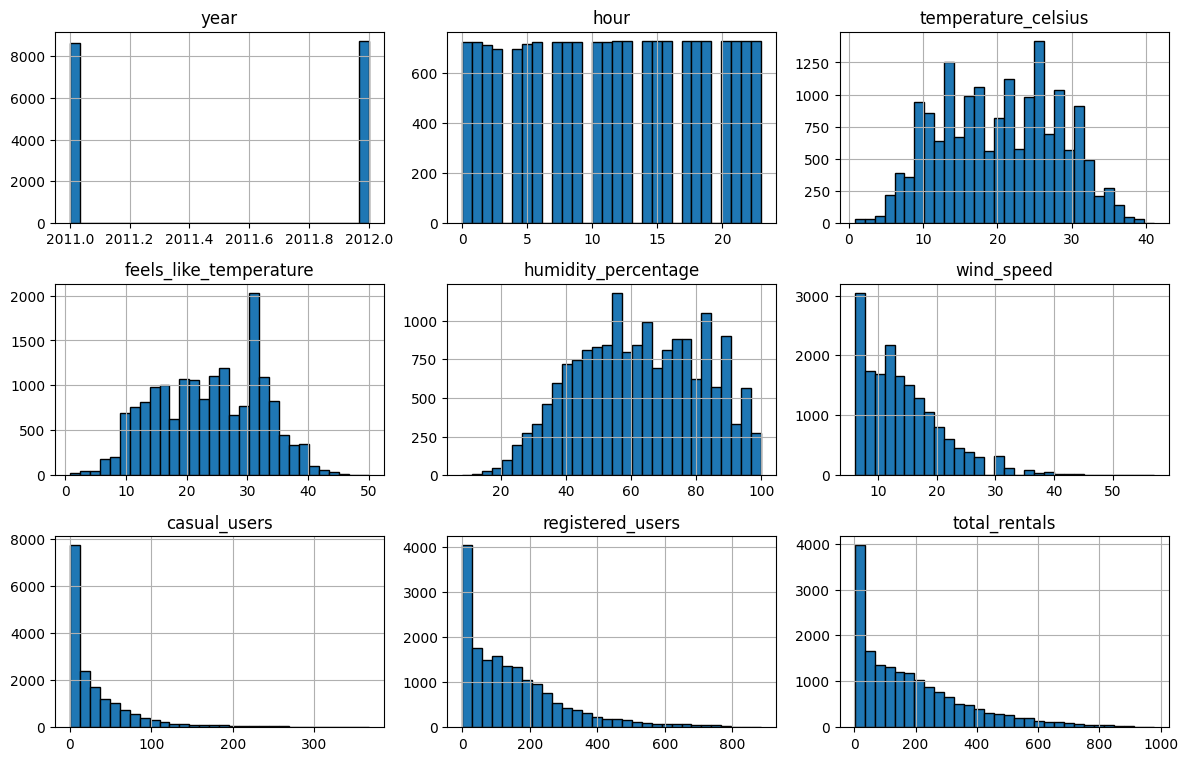

In [ ]:
numerical_columns1 = hour_df.select_dtypes(include=['number'])

numerical_columns1.hist(figsize=(12, 10), bins=30, layout=(4, 3), edgecolor='black')

plt.tight_layout()
plt.show()

**Insight:**

- Karena kita memiliki label season yang pasti identik dengan temperature_celsius, feels_like_temperature, humidity_percentage, dan wind_speed, maka perlu diindentifikasi karakteristik musimnya.

In [ ]:
round(hour_df.groupby(by= "season").agg({
    'temperature_celsius': 'mean',
    'feels_like_temperature': 'mean',
    'humidity_percentage': 'mean',
    'wind_speed': 'mean',
}), 2)


,temperature_celsius,feels_like_temperature,humidity_percentage,wind_speed
season,,,,
fall,28.96,32.80,63.32,13.29
springer,12.27,14.92,58.46,15.72
summer,22.33,26.03,62.70,14.78
winter,17.35,20.79,66.71,13.59


**Insight:**

- Selanjurnya adalah akan dicari nilai korelasi dari masing-masing label yang bisa dianalisis (nilai int atau float) yaitu hour, temperature_celsius, feels_like_temperature, humidity_percentage, wind_speed, casual_users, registered_users, total_rentals.


<Axes: >

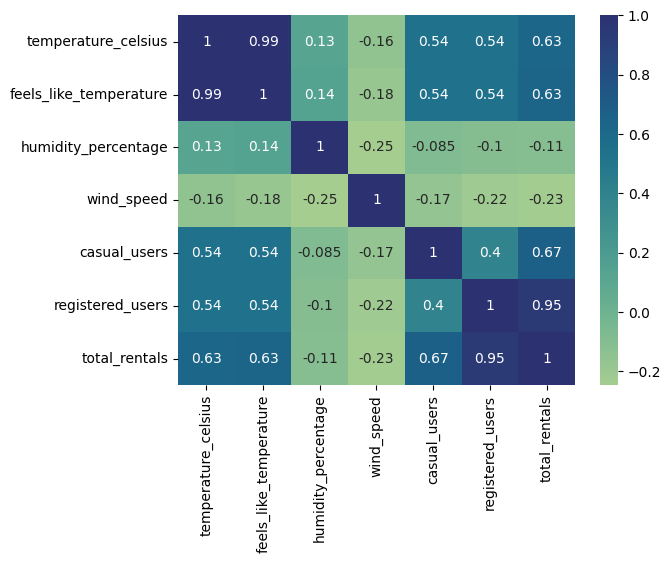

In [ ]:
hour_df[['hour','temperature_celsius', 'feels_like_temperature', 'humidity_percentage', 'wind_speed','casual_users','registered_users','total_rentals']].corr()
sns.heatmap(data=cor, annot=True, cmap="crest")

**Insight:**

- Berikut merupakan korelasi temperature_celsius, feels_like_temperature, humidity_percentage, wind_speed, casual_users, registered_users, total_rentals. Diperoleh informasi bahwa yang mempengaruhi total_rentals dan banyak pengguna adalah hour, variabel temperature_celsius dan feels_like_temperature. Selain itu total_rentals juga dipengaruhi variabel humidity_percentage dengan postifi lemah dan wind_speed dengan korelasi negatif tetapi cukup lemah.

In [ ]:
hour_df[['holiday','working_day']].value_counts()

holiday  working_day
False    True           11865
         False           5014
True     False            500
Name: count, dtype: int64

**Insight:**

- Diperoleh informasi bahwa dalam 17.379 jam diperoleh jam yang bekerja 11.865 jam dan tidak bekerja 5514 jam dengan termasuk holiday 500 jam..

In [ ]:
hour_df.pivot_table(index='season', values='total_rentals', aggfunc=['mean', 'sum'])

,mean,sum
,total_rentals,total_rentals
season,,
fall,236.016237,1061129
springer,111.114569,471348
summer,208.344069,918589
winter,198.868856,841613


**Insight:**

- Diperoleh bahwa paling banyak orang menggunakan bike-sharing rental pada fall season dengan rataan 237 buah dan total 1.061.129 buah

In [ ]:
hour_df.pivot_table(index='working_day', values='total_rentals', aggfunc=['mean', 'sum'])

,mean,sum
,total_rentals,total_rentals
working_day,,
False,181.405332,1000269
True,193.207754,2292410


**Insight:**

- Diperoleh bahwa paling banyak orang menggunakan bike-sharing rental pada saat hari kerja tapi tetap banyak ketika hari libur (rataan tidak terlalu jauh).

In [ ]:
pv_wheather_total=(hour_df.pivot_table(index='weather_condition', values='total_rentals', aggfunc=['mean', 'sum'])
                   .sort_values(by=('sum', 'total_rentals'), ascending=False)
                    .reset_index())
pv_wheather_total

,weather_condition,mean,sum
,,total_rentals,total_rentals
0,Clear,204.869272,2338173
1,Cloudy,175.165493,795952
2,Rain/ Snow,111.579281,158331
3,Stormy,74.333333,223


**Insight:**

- Diperoleh bahwa paling banyak orang menggunakan bike-sharing rental pada saat kondisi cuaca Clear.

In [ ]:
pv_weekday_total = (hour_df.pivot_table(index='weekday', values='total_rentals', aggfunc=['mean', 'sum'])
                    .sort_values(by=('sum', 'total_rentals'), ascending=False)
                    .reset_index())

pv_weekday_total

,weekday,mean,sum
,,total_rentals,total_rentals
0,Friday,196.135907,487790
1,Thursday,196.436665,485395
2,Saturday,190.209793,477807
3,Wednesday,191.130505,473048
4,Tuesday,191.238891,469109
5,Monday,183.744655,455503
6,Sunday,177.468825,444027


**Insight:**

- Diperoleh bahwa paling banyak orang menggunakan bike-sahring pada hari Friday, tapi sebenarnya tersebar rata di setiap harinya (rataan tidak terlalu jauh).

In [ ]:
pv_month_total = (hour_df.pivot_table(index='month', values='total_rentals', aggfunc=['mean', 'sum'])
                  .sort_values(by=('sum', 'total_rentals'), ascending=False)
                  .reset_index())

pv_month_total

,month,mean,sum
,,total_rentals,total_rentals
0,August,238.097627,351194
1,June,240.515278,346342
2,September,240.773138,345991
3,July,231.819892,344948
4,May,222.907258,331686
5,October,222.158511,322352
6,April,187.260960,269094
7,November,177.335421,254831
8,March,155.410726,228920


**Insight:**

- Diperoleh bahwa paling banyak orang menggunakan bike-sharing pada bulan August dan paling sedikit di bulan Januari.

In [ ]:
pv_hour_total = (hour_df.pivot_table(index='hour', values='total_rentals', aggfunc=['mean', 'sum'])
                 .sort_values(by=('sum', 'total_rentals'), ascending=False)
                 .reset_index())

pv_hour_total

,hour,mean,sum
,,total_rentals,total_rentals
0,17,461.452055,336860
1,18,425.510989,309772
2,8,359.011004,261001
3,16,311.983562,227748
4,19,311.523352,226789
5,13,253.661180,184919
6,12,253.315934,184414
7,15,251.233196,183149
8,14,240.949246,175652


**Insight:**

- Diperoleh bahwa paling banyak orang menggunakan bike-sharing pada pukul 17:00 dan paling sedikit pada pukul 04:00.

In [ ]:
total_values = hour_df[['casual_users', 'registered_users', 'total_rentals']].sum()
total_values

,0
casual_users,620017
registered_users,2672662
total_rentals,3292679


In [ ]:
hour_df.groupby(by=['hour','weekday']).agg({
    'weekday': 'count'
})

weekday
hour weekday           
0    Friday         104
     Monday         105
     Saturday       105
     Sunday         104
     Thursday       103
...                 ...
23   Saturday       104
     Sunday         105
     Thursday       104
     Tuesday        104
     Wednesday      103

[168 rows x 1 columns]

**Insight:**

- Dapat diperoleh bahwa persebaran jumlah pada tiap jam cukup merata untuk setiap harinya

In [ ]:
hour_df.weather_condition.value_counts()

,count
weather_condition,
Clear,11413
Cloudy,4544
Rain/ Snow,1419
Stormy,3


**Insight:**

- Pada data diperoleh bahwa kondisi cuaca paling banyak adalah ketika Clear selanjutnya Cloudly dan terakhir Rain/Snow. Paling sedikit stormy yaitu 3.

In [ ]:
work_vs_day = hour_df.groupby(by=['hour']).agg({
    'casual_users': 'sum',
    'registered_users': 'sum',
    'total_rentals': 'sum'
}).sort_values(by='hour', ascending=True).reset_index()

work_vs_day

,hour,casual_users,registered_users,total_rentals
0,0,7375,31755,39130
1,1,4709,19455,24164
2,2,3412,12940,16352
3,3,1893,6281,8174
4,4,874,3554,4428
5,5,1012,13249,14261
6,6,3017,52115,55132
7,7,8037,146134,154171
8,8,15761,245240,261001
9,9,22458,136980,159438


**Insight:**

- Informasi rata-rata user pada tiap jamnya

In [ ]:
hour_df.season.value_counts()

,count
season,
fall,4496
summer,4409
springer,4242
winter,4232


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola musiman memengaruhi jumlah penyewaan sepeda?

In [ ]:
user_v_season = round(day_df.groupby(by=['season']).agg({
    'temperature_celsius': 'mean',
    'feels_like_temperature': 'mean',
    'total_rentals': 'sum'
}), 2).reset_index().sort_values(by='total_rentals', ascending=False)

user_v_season

,season,temperature_celsius,feels_like_temperature,total_rentals
0,fall,28.96,32.79,1061129
2,summer,22.32,26.02,918589
3,winter,17.34,20.78,841613
1,springer,12.21,14.85,471348


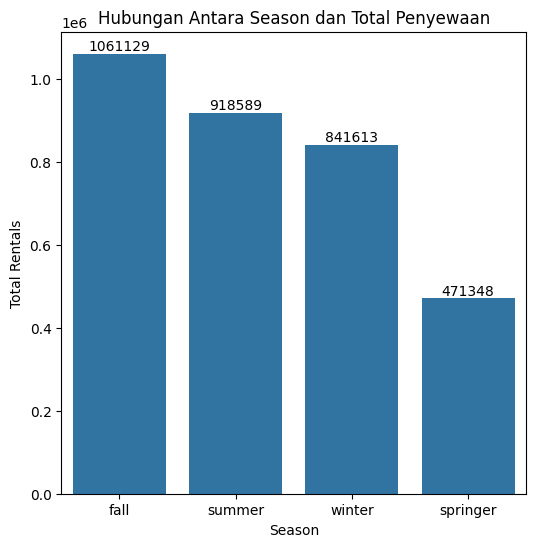

In [105]:
plt.figure(figsize=(6, 6))  # Lebih kecil karena hanya satu plot
plt.title('Hubungan Antara Season dan Total Penyewaan')

sns.barplot(
    data=user_v_season,
    x='season',
    y='total_rentals',
)

for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt="%d", color='black')

plt.xlabel("Season")
plt.ylabel("Total Rentals")
plt.show()


**Insight:**

Banyaknya penyewaan sepeda terjadi pada saat fall season atau musim gugur sebanyak 1.061.129 buah dan ini juga berhubungan dengan temperature_celsius yang juga semakin tinggi pada fall season.


### Pertanyaan 2: Apakah jumlah penyewaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan?


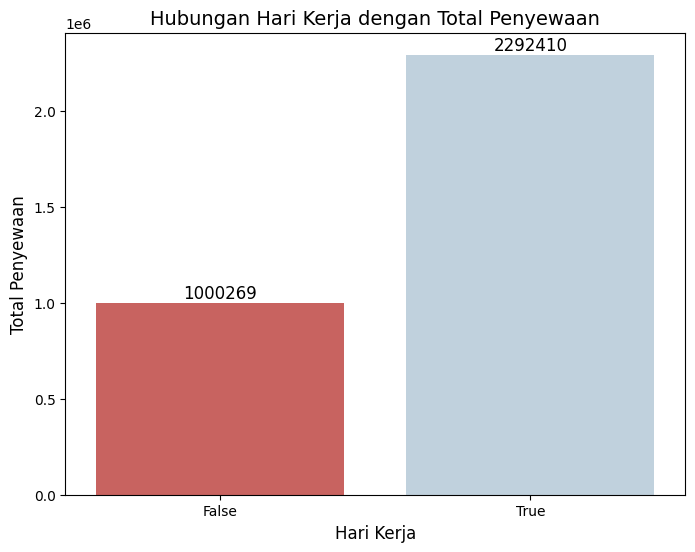

In [ ]:
day_summary = day_df.groupby("working_day", as_index=False)["total_rentals"].sum()

plt.figure(figsize=(8, 6))

colors = ["#D9534F", "#bbd2e2"]

graph = sns.barplot(
    data=day_summary,
    x="working_day",
    y="total_rentals",
    hue="working_day",
    palette=colors,
    legend=False
)

for i in graph.containers:
    graph.bar_label(i, fmt="%d", fontsize=12, color="black")

plt.title("Hubungan Hari Kerja dengan Total Penyewaan", fontsize=14)
plt.xlabel("Hari Kerja", fontsize=12)
plt.ylabel("Total Penyewaan", fontsize=12)

plt.show()


**Insight:**

Penyewaan lebih banyak saat hari kerja dengan total dalam 2 tahun adalah 2.292.410 buah.

### Pertanyaan 3: Apakah kondisi cuaca memengaruhi tren penyewaan sepeda?

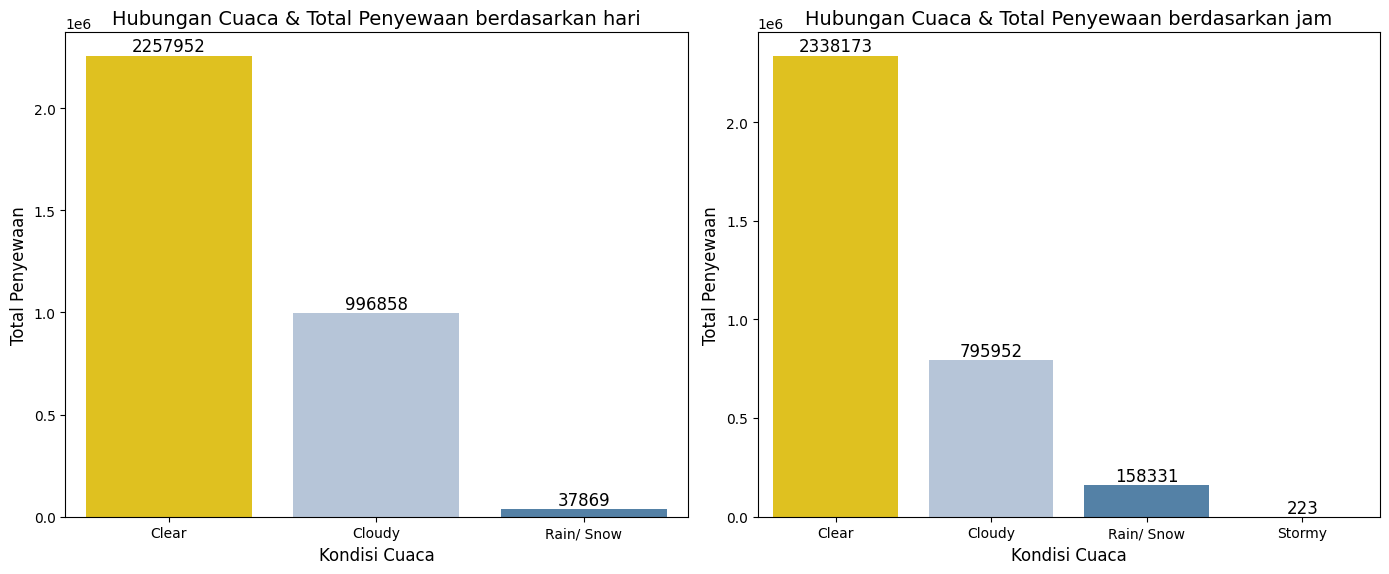

In [ ]:
day_summary1 = day_df.groupby('weather_condition', as_index=False)['total_rentals'].sum()

hour_summary1 = hour_df.groupby('weather_condition', as_index=False)['total_rentals'].sum()

daycolors = ['#FFD700', '#B0C4DE', '#4682B4']
hourcolors = ['#FFD700', '#B0C4DE', '#4682B4','#2F4F4F']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

graph1 = sns.barplot(
    ax=axes[0],
    data=day_summary1,
    x='weather_condition',
    y='total_rentals',
    hue='weather_condition',
    palette=daycolors,
    legend=False
)
axes[0].set_title('Hubungan Cuaca & Total Penyewaan berdasarkan hari', fontsize=14)
axes[0].set_xlabel('Kondisi Cuaca', fontsize=12)
axes[0].set_ylabel('Total Penyewaan', fontsize=12)

for i in graph1.containers:
    graph1.bar_label(i, fmt="%d", fontsize=12, color="black")

graph2 = sns.barplot(
    ax=axes[1],
    data=hour_summary1,
    x='weather_condition',
    y='total_rentals',
    hue='weather_condition',
    palette=hourcolors,
    legend=False
)
axes[1].set_title('Hubungan Cuaca & Total Penyewaan berdasarkan jam', fontsize=14)
axes[1].set_xlabel('Kondisi Cuaca', fontsize=12)
axes[1].set_ylabel('Total Penyewaan', fontsize=12)

for i in graph2.containers:
    graph2.bar_label(i, fmt="%d", fontsize=12, color="black")

# Menampilkan grafik
plt.tight_layout()
plt.show()


**Insight:**

Ada tren yang disebabkan oleh kondisi cuaca dalam penyewaan sepeda. Hal ini dikarenakan lebih banyak adanya penyewaan saat cuaca Clear dengan total dalam 2 tahun adalah 2.257.952 buah jika dalam skala hari dan 2.338.173 buah  dalam skala jam.

Banyaknya kondisi cuaca dalam 2 tahun juga pada cuaca Clear sehingga sangat menguntungkan. Namun, terdapat beberapa kondisi saat cuaca buruk yaitu rain/snow dan stormy sehingga perlu dianalisis dalam hal infrastruktur lalu lintas.


### Pertanyaan 4: Pada hari apa penyewaan sepeda mencapai jumlah tertinggi?

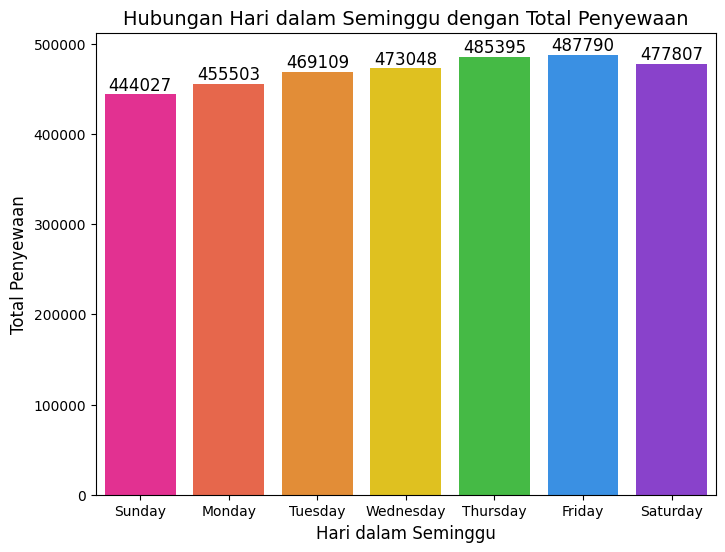

In [ ]:
order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

day_summary2 = day_df.groupby('weekday', as_index=False)['total_rentals'].sum()

day_summary2['weekday'] = pd.Categorical(day_summary2['weekday'], categories=order, ordered=True)

day_summary2 = day_summary2.sort_values('weekday')

colors = ['#FF1493', '#FF5733', '#FF8D1A', '#FFD700', '#32CD32', '#1E90FF', '#8A2BE2']

plt.figure(figsize=(8, 6))

graph = sns.barplot(
    data=day_summary2,
    x='weekday',
    y='total_rentals',
    hue='weekday',
    palette=colors,
    legend=False
)

for i in graph.containers:
    graph.bar_label(i, fmt="%d", fontsize=12, color="black")

plt.title("Hubungan Hari dalam Seminggu dengan Total Penyewaan", fontsize=14)
plt.xlabel("Hari dalam Seminggu", fontsize=12)
plt.ylabel("Total Penyewaan", fontsize=12)

plt.show()


**Insight:**

Total penyewaan sepeda paling banyak adalah pada Hari Friday dengan total dalam 2 tahun adalah 487.790 buah.


### Pertanyaan 5: Di bulan apa jumlah penyewaan sepeda paling tinggi?


<ipython-input-98-2578fffe59b8>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(


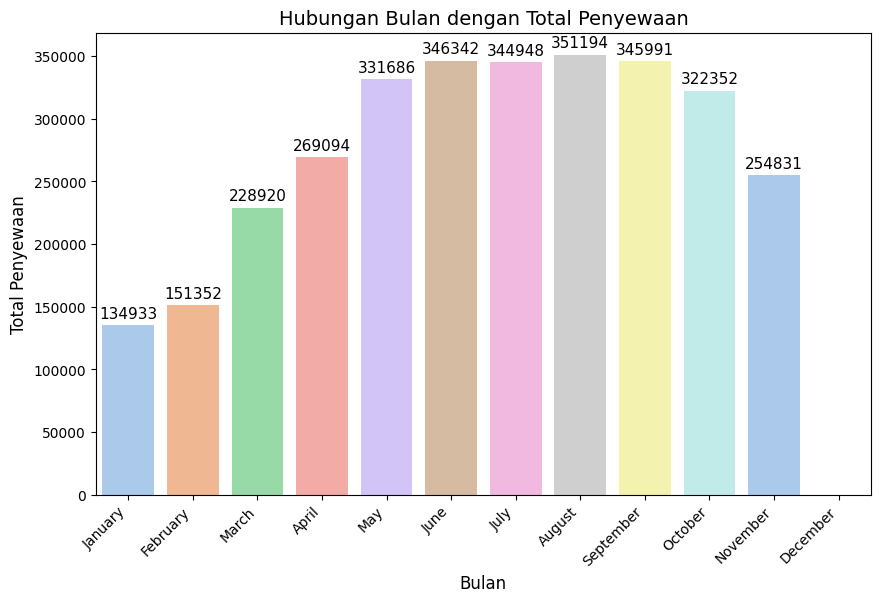

In [ ]:
day_df['month'] = day_df['month'].astype(str)

month_summary = day_df.groupby('month', as_index=False)['total_rentals'].sum()

month_summary = month_summary.dropna(subset=['month'])

order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

month_summary['month'] = pd.Categorical(month_summary['month'], categories=order, ordered=True)
month_summary = month_summary.sort_values('month')

colors = sns.color_palette("pastel", 12)

plt.figure(figsize=(10, 6))

graph = sns.barplot(
    data=month_summary,
    x='month',
    y='total_rentals',
    palette=colors,
)

for i in graph.containers:
    graph.bar_label(i, fmt="%d", fontsize=11, color="black", label_type="edge", padding=3)

plt.xticks(rotation=45, ha="right")

plt.title("Hubungan Bulan dengan Total Penyewaan", fontsize=14)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Total Penyewaan", fontsize=12)

plt.show()

**Insight:**

Penyewaan tertinggi ada pada Bulan Agustus dengan total dalam 2 tahun adalah 351.194 buah.


### Pertanyaan 6: Mana yang lebih banyak: pengguna terdaftar atau pengguna tidak terdaftar?

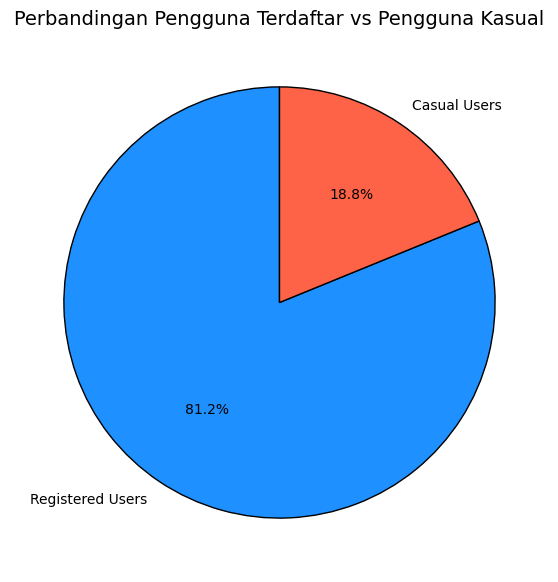

In [ ]:
user_counts = [day_df['registered_users'].sum(), day_df['casual_users'].sum()]
labels = ['Registered Users', 'Casual Users']
colors = ['#1E90FF', '#FF6347']

plt.figure(figsize=(7, 7))
plt.pie(
    user_counts,
    labels=labels,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)

plt.title("Perbandingan Pengguna Terdaftar vs Pengguna Kasual", fontsize=14)

plt.show()


**Insight:**

Total penyewaan terdiri dari pengguna kasual dan terdaftar. Ternyata, 81,2% merupakan pengguna terdaftar dan paling banyak yaitu sebanyak 2.672.662 orang.


### Pertanyaan 7: Bagaimana tren total penyewaan sepeda dari waktu ke waktu?

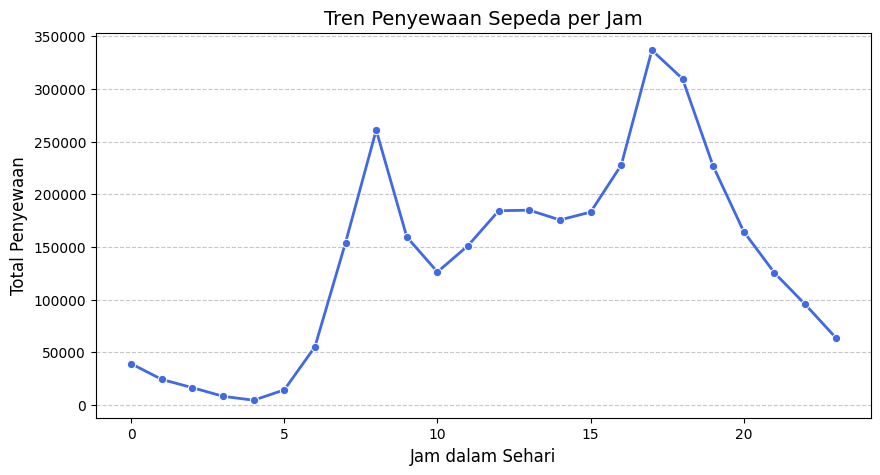

In [ ]:
plt.figure(figsize=(10, 5))

sns.lineplot(
    data=hour_df.groupby('hour', as_index=False)['total_rentals'].sum(),
    x='hour',
    y='total_rentals',
    marker='o',  # Tambahkan titik di setiap jam
    color='royalblue',  # Warna garis
    linewidth=2
)

plt.title('Tren Penyewaan Sepeda per Jam', fontsize=14)
plt.xlabel('Jam dalam Sehari', fontsize=12)
plt.ylabel('Total Penyewaan', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Tambahkan grid agar lebih jelas

plt.show()


**Insight:**

Total penyewaan tertinggi adalah pada waktu sore hari yaitu pukul 17:00. Waktu ini merupakan jam pulang kerja.

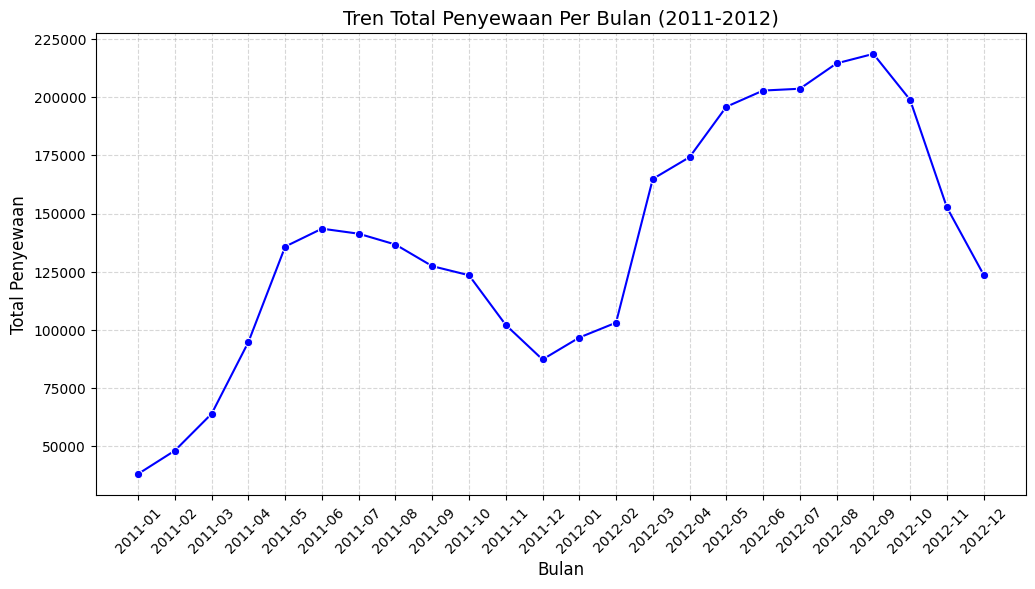

In [ ]:
day_df['date'] = pd.to_datetime(day_df['date'])

day_df['year_month'] = day_df['date'].dt.to_period('M')

monthly_rentals = day_df.groupby('year_month')['total_rentals'].sum().reset_index()

monthly_rentals['year_month'] = monthly_rentals['year_month'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_rentals, x='year_month', y='total_rentals', marker='o', color='b')

plt.title('Tren Total Penyewaan Per Bulan (2011-2012)', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Total Penyewaan', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


**Insight:**

Tren dari total penyewaan dari waktu ke waktu pada Bulan Januari 2011 hingga Desember 2012 mengalami fase naik dan turun dengan tren naik setiap pertengahan tahun dan turun setiap akhir tahun.


## Conclusion

Berdasarkan hasil analisis data, terdapat beberapa tren signifikan dalam pola penyewaan sepeda yang dapat digunakan untuk meningkatkan strategi bisnis dan operasional perusahaan:  
- **Musim Gugur dan Temperatur Tinggi Meningkatkan Penyewaan**  
   Peningkatan penyewaan sepeda terjadi saat musim gugur dengan temperatur tinggi. Ini menunjukkan bahwa cuaca yang nyaman mempengaruhi minat pelanggan dalam menggunakan sepeda.  Divisi Operasional dan Logistik dapat menyediakan lebih banyak sepeda pada musim ini.

- **Hari Kerja Lebih Ramai Dibanding Akhir Pekan**  
   Penyewaan lebih tinggi pada hari kerja, terutama pada jam pulang kerja (pukul 17:00). Hal ini menandakan bahwa mayoritas pengguna adalah pekerja yang menggunakan sepeda sebagai transportasi harian.  Divisi Operasional dan Logistik dapat menyediakan lebih banyak sepeda pada hari kerja, khususnya pukul 17:00. Selain itu, Divisi Pengembangan Produk dan Teknologi dapat berinovasi untuk menyediakan sistem reservasi yang memungkinkan pengguna memesan dari waktu sebelumnya.

- **Pengaruh Cuaca Terhadap Penyewaan**  
   Cuaca cerah (Clear) mendukung penyewaan yang lebih tinggi, sedangkan kondisi hujan/salju dan badai mengurangi jumlah penyewaan. Oleh karena itu, kondisi infrastruktur lalu lintas saat cuaca buruk perlu mendapat perhatian lebih.  Divisi Infrastruktur atau Keamanan wajib untuk memastikan jalur sepeda tetap aman pada saat cuaca buruk terjadi (hujan atau badai).

- **Puncak Penyewaan pada Hari Tertentu**  
   **Hari Jumat** menjadi hari dengan penyewaan tertinggi dalam seminggu. Hal ini dapat menjadi peluang bagi Divisi Pemasaran & Promosi untuk fokus pada hari selain hari Jumat dengan promosi dan diskon pada program keanggotaan.

- **Puncak Penyewaan pada Bulan Tertentu**
   **Bulan Agustus** mencatatkan jumlah penyewaan tertinggi dalam setahun. Hal ini dapat menjadi peluang bagi Divisi Pemasaran & Promosi untuk fokus pada bulan selain bulan Agustus dengan promosi dan diskon pada program keanggotaan.

- **Pengguna Terdaftar Jauh Lebih Banyak Dibanding Tidak Terdaftar (Kasual)**
   Diketahui bahwa lebih banyak anggota dibanding pengguna bukan anggota. Hal ini menunjukkan loyalitas pelanggan yang bagus tetapi pengguna bukan anggota tetap dapat berpotensi untuk menjadi pelanggan sehingga perlu di telusuri oleh Divisi Pemasaran & Promosi untuk dapat mendapatkan atensi pengguna bukan anggota agar menjadi anggota.

-  **Tren penyewaan menunjukkan kenaikan pertengahan tahun dan penurunan di akhir tahun**
   Hal ini bisa disebabkan oleh faktor cuaca atau kebiasaan pengguna. Divisi Pemasaran & Promosi dapat melakukan strategi promosi pada akhir tahun agar tidak terjadi penurunanan.
   




In [ ]:
day_df.to_csv("day1_data.csv", index=False)

In [ ]:
hour_df.to_csv("hour1_data.csv", index=False)